In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [72]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/bank_marketing.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [74]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [75]:
df.shape

(11162, 17)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [77]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [78]:
df.value_counts

<bound method DataFrame.value_counts of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duratio

In [79]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

<Axes: >

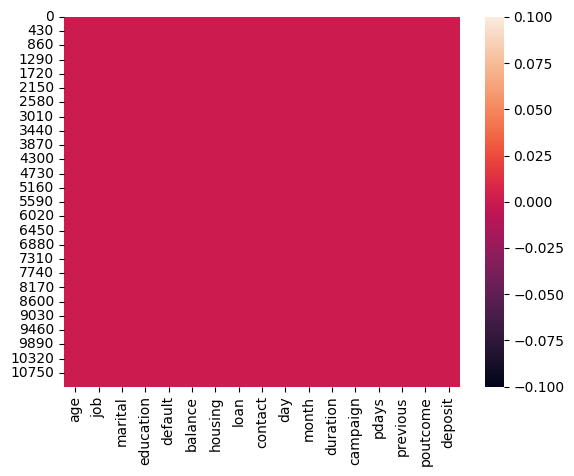

In [80]:
sns.heatmap(df.isnull())

In [81]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [82]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


<Axes: >

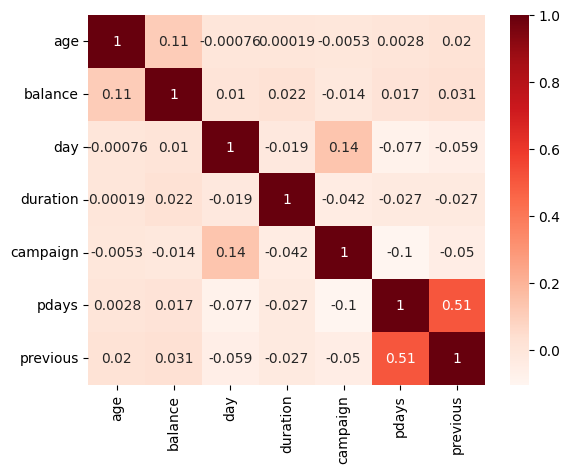

In [83]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [84]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [85]:
categorical_data
numeric_data

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [86]:
d = {'no': 0, 'yes': 1}
df['deposit'] = df['deposit'].map(d).fillna(df['deposit'])

In [87]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [88]:
df['age'].value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

<Axes: title={'center': 'Deposit value counts'}>

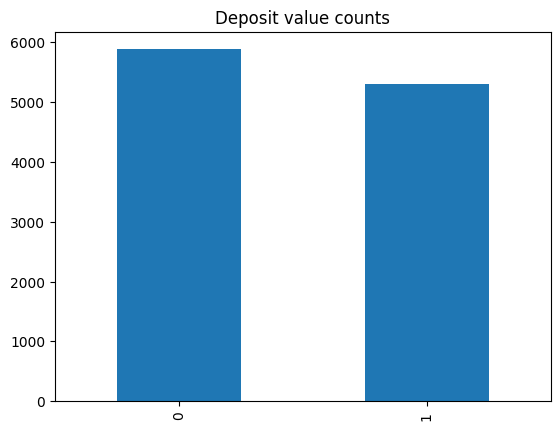

In [89]:
df['deposit'].value_counts().plot.bar(title = 'Deposit value counts')

no     5881
yes    5281
Name: housing, dtype: int64


<Axes: xlabel='housing', ylabel='count'>

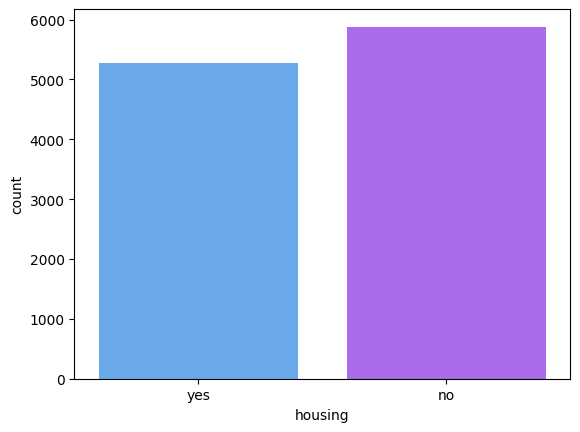

In [90]:
print(df['housing'].value_counts())
sns.countplot(x=df['housing'], palette = 'cool')

no     10994
yes      168
Name: default, dtype: int64


<Axes: xlabel='default', ylabel='count'>

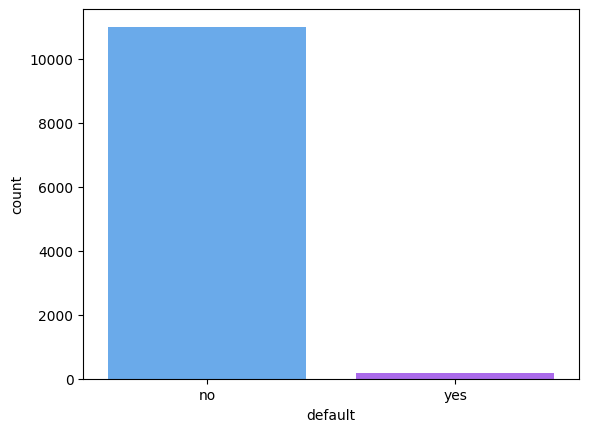

In [91]:
print(df['default'].value_counts())
sns.countplot(x=df['default'], palette = 'cool')

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


<Axes: xlabel='job', ylabel='count'>

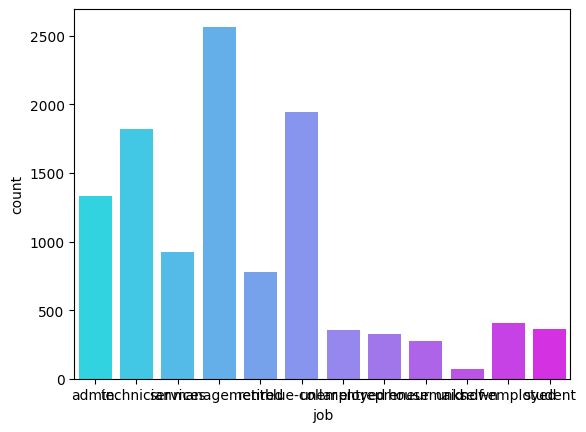

In [92]:
print(df['job'].value_counts())
sns.countplot(x=df['job'], palette = 'cool')

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64


<Axes: xlabel='marital', ylabel='count'>

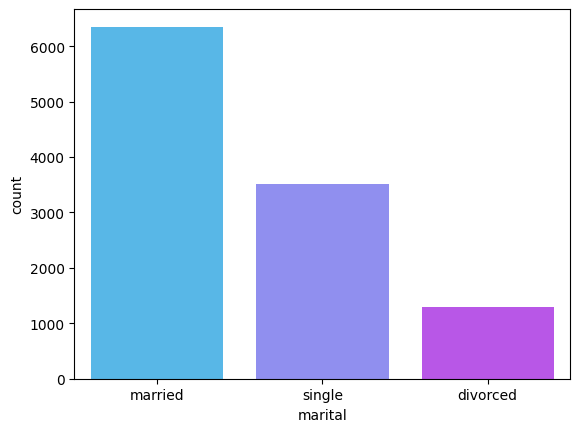

In [93]:
print(df['marital'].value_counts())
sns.countplot(x=df['marital'], palette = 'cool')

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


<Axes: xlabel='education', ylabel='count'>

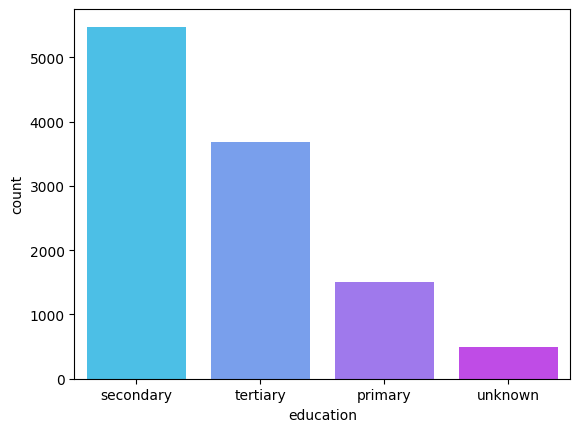

In [94]:
print(df['education'].value_counts())
sns.countplot(x=df['education'], palette = 'cool')

no     9702
yes    1460
Name: loan, dtype: int64


<Axes: xlabel='loan', ylabel='count'>

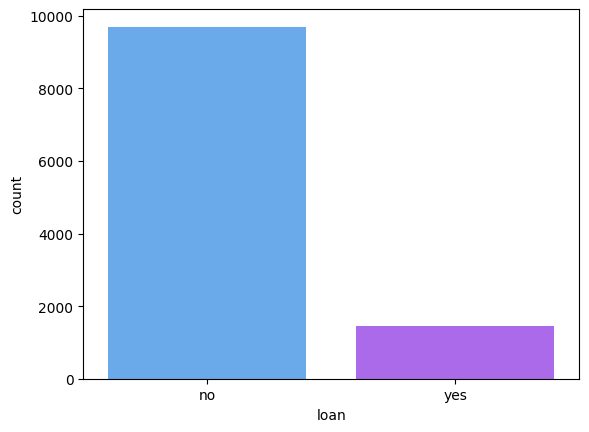

In [95]:
print(df['loan'].value_counts())
sns.countplot(x=df['loan'], palette = 'cool')

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64


<Axes: xlabel='month', ylabel='count'>

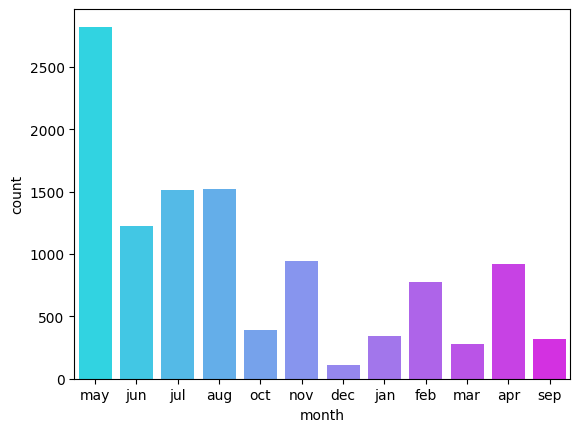

In [96]:
print(df['month'].value_counts())
sns.countplot(x=df['month'], palette = 'cool')

<Axes: title={'center': 'comparison between age and deposit'}, xlabel='age', ylabel='deposit'>

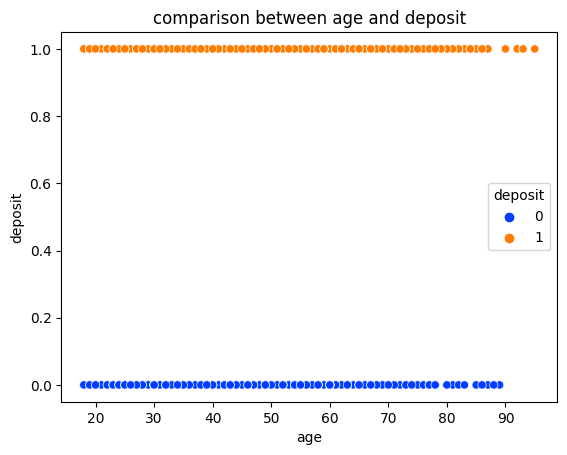

In [97]:
plt.title('comparison between age and deposit')
sns.scatterplot(x = 'age', y = 'deposit', data=df, hue='deposit', palette ='bright')

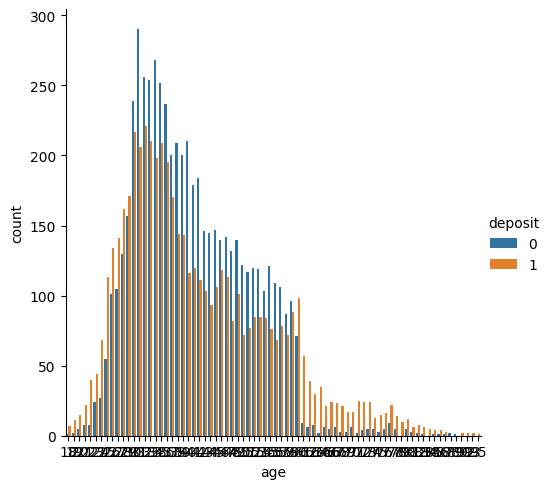

In [98]:
sns.catplot(x="age",kind="count",data=df,hue="deposit")


0    5873
1    5289
Name: deposit, dtype: int64


<Axes: xlabel='deposit'>

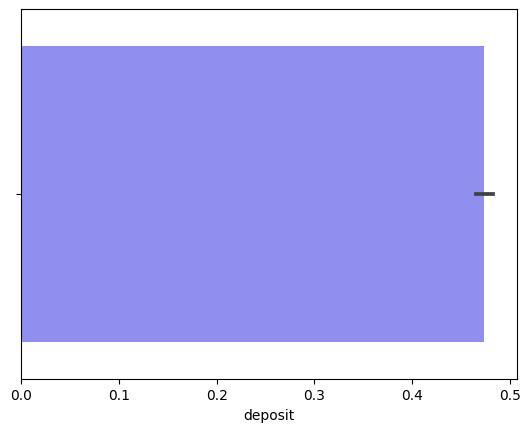

In [99]:
print(df['deposit'].value_counts())
sns.barplot(x=df['deposit'],palette='cool')

<Axes: xlabel='deposit'>

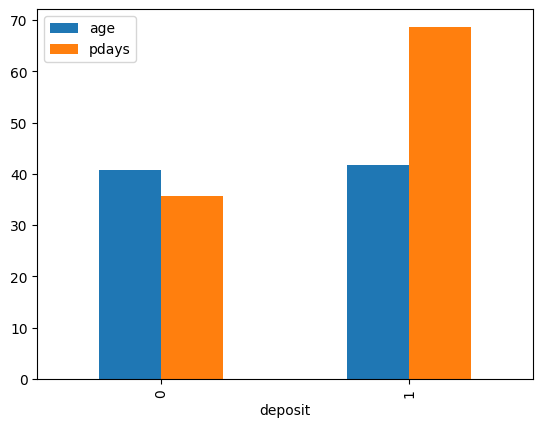

In [102]:
df[['age','deposit','pdays']].groupby(['deposit']).mean().plot.bar()


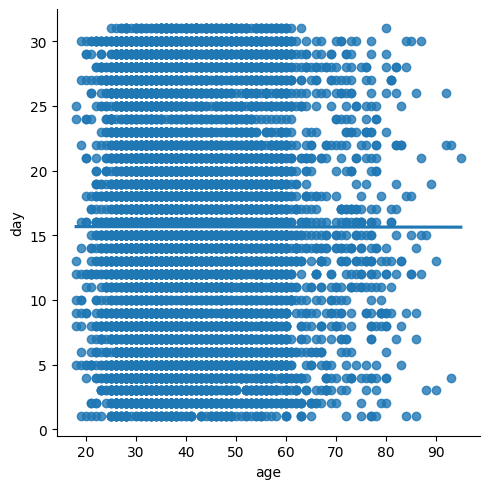

In [122]:
sns.lmplot(x = "age",
            y = "day", 
            ci = None,
            data = df)

<Axes: xlabel='deposit'>

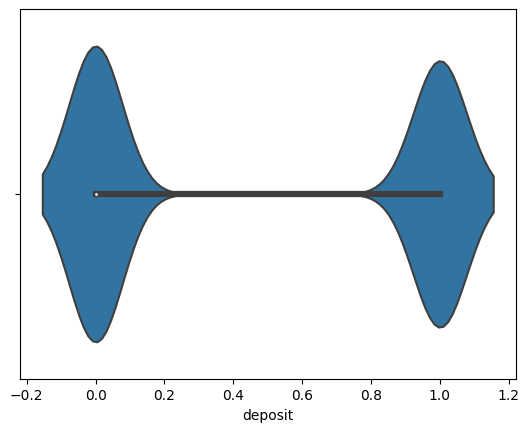

In [105]:
sns.violinplot(x=df["deposit"])


<Axes: >

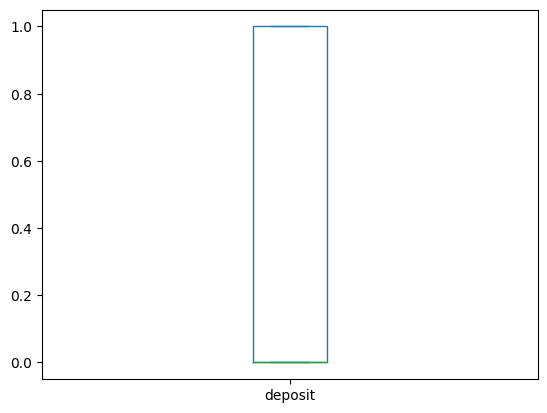

In [107]:
df['deposit'].plot.box()

<Axes: >

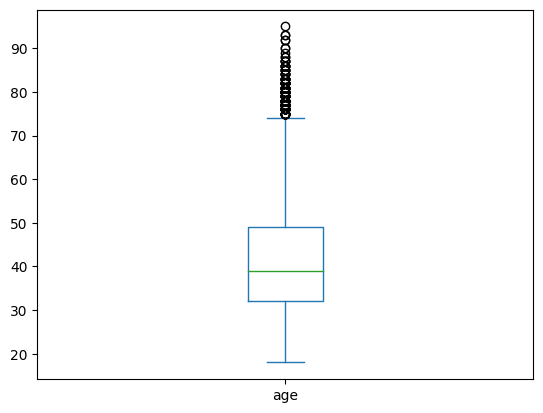

In [109]:
df['age'].plot.box()

<Axes: >

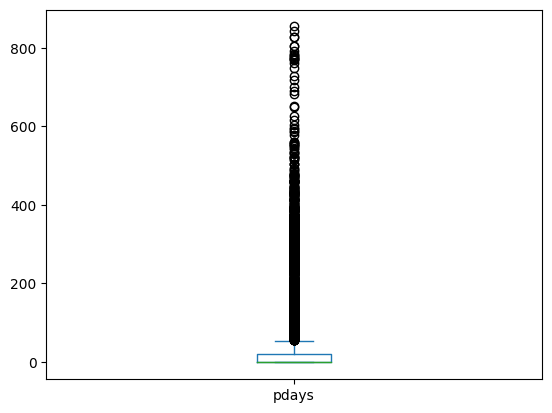

In [112]:
df['pdays'].plot.box()

<Axes: >

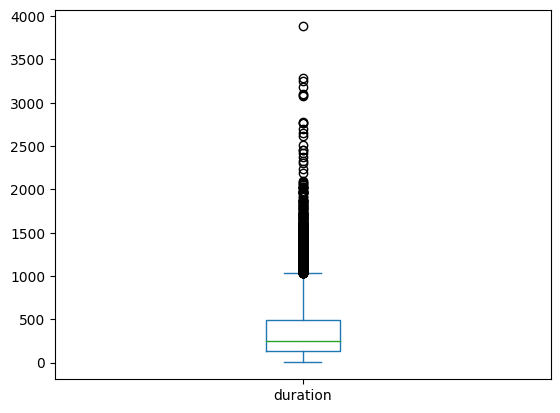

In [113]:
df['duration'].plot.box()

age            Axes(0.125,0.53;0.110714x0.35)
balance     Axes(0.257857,0.53;0.110714x0.35)
day         Axes(0.390714,0.53;0.110714x0.35)
duration    Axes(0.523571,0.53;0.110714x0.35)
campaign    Axes(0.656429,0.53;0.110714x0.35)
pdays       Axes(0.789286,0.53;0.110714x0.35)
previous       Axes(0.125,0.11;0.110714x0.35)
deposit     Axes(0.257857,0.11;0.110714x0.35)
dtype: object

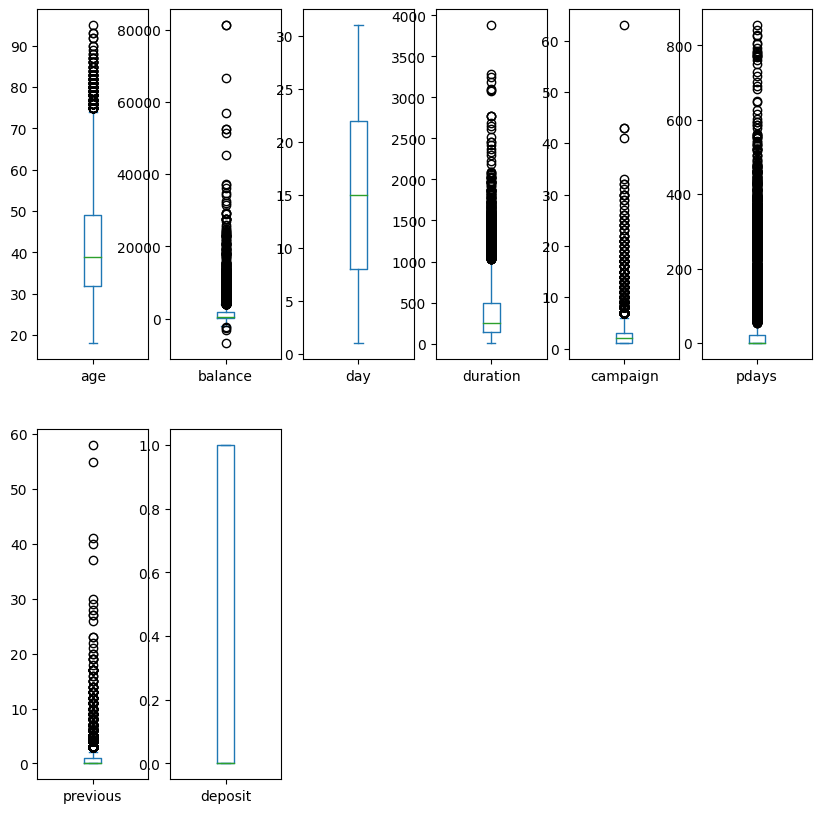

In [114]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

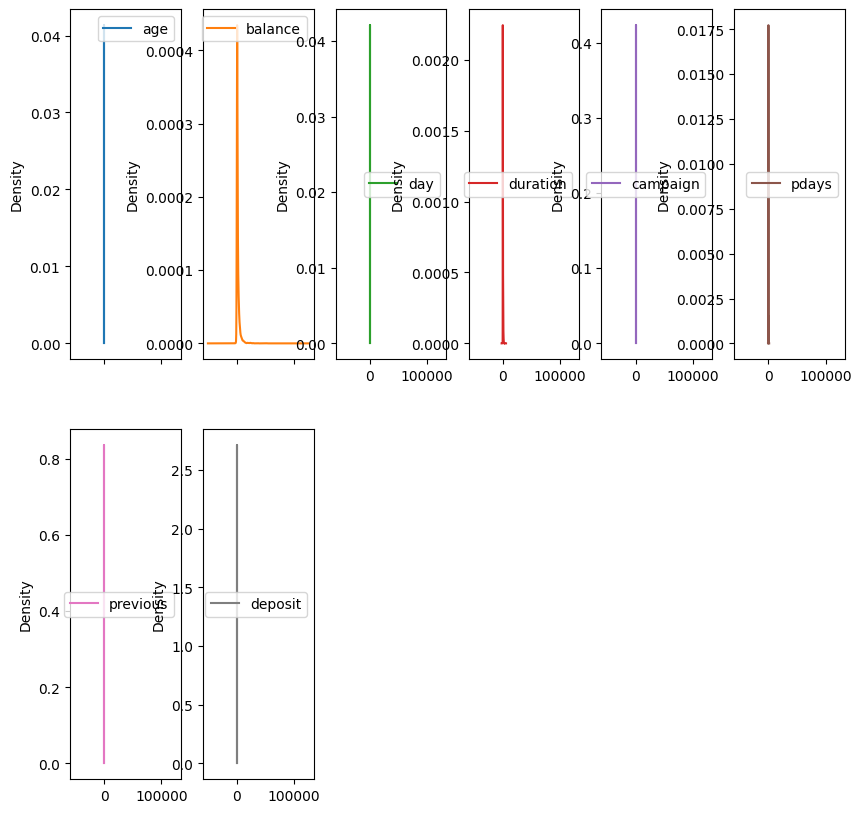

In [118]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

Text(0.5, 1.0, 'age vs duration')

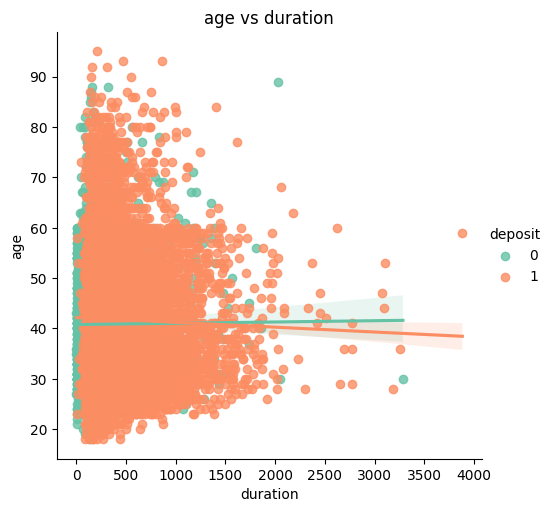

In [125]:
ax = sns.lmplot(x = 'duration', y = 'age', data = df, hue = 'deposit', palette = 'Set2')
plt.title('age vs duration')

Text(0.5, 1.0, 'age vs day')

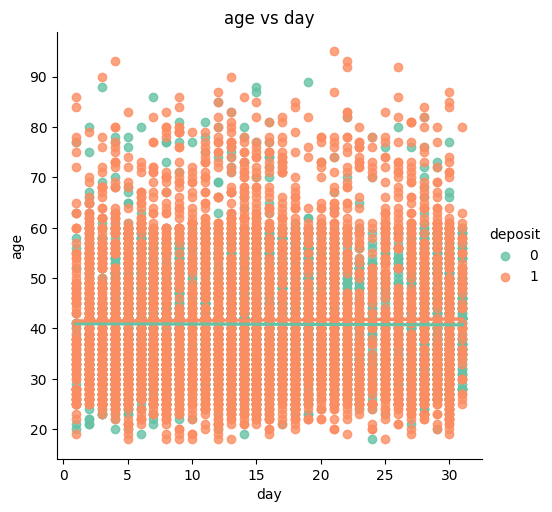

In [128]:
ax= sns.lmplot(x = 'day', y = 'age', data = df, hue = 'deposit', palette = 'Set2')
plt.title('age vs day')

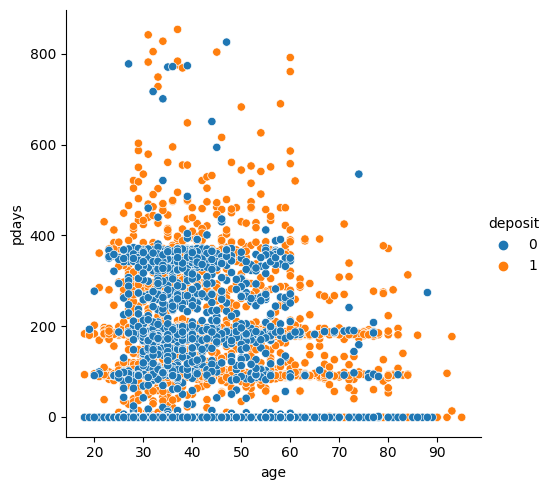

In [126]:
sns.relplot(x ="age", y ="pdays", 
            hue ="deposit", data = df);

<Axes: xlabel='day', ylabel='pdays'>

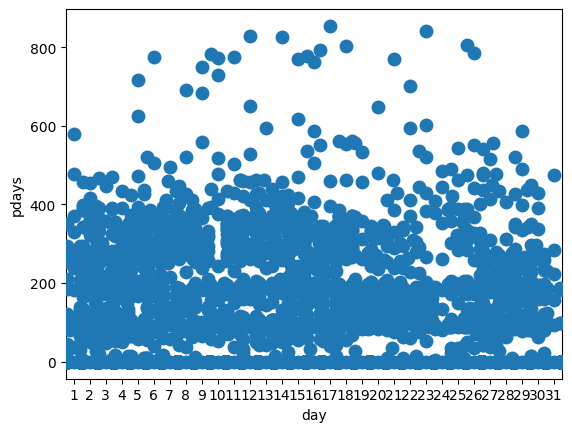

In [127]:
sns.swarmplot(x ="day", y = "pdays", 
              data = df, size = 10)

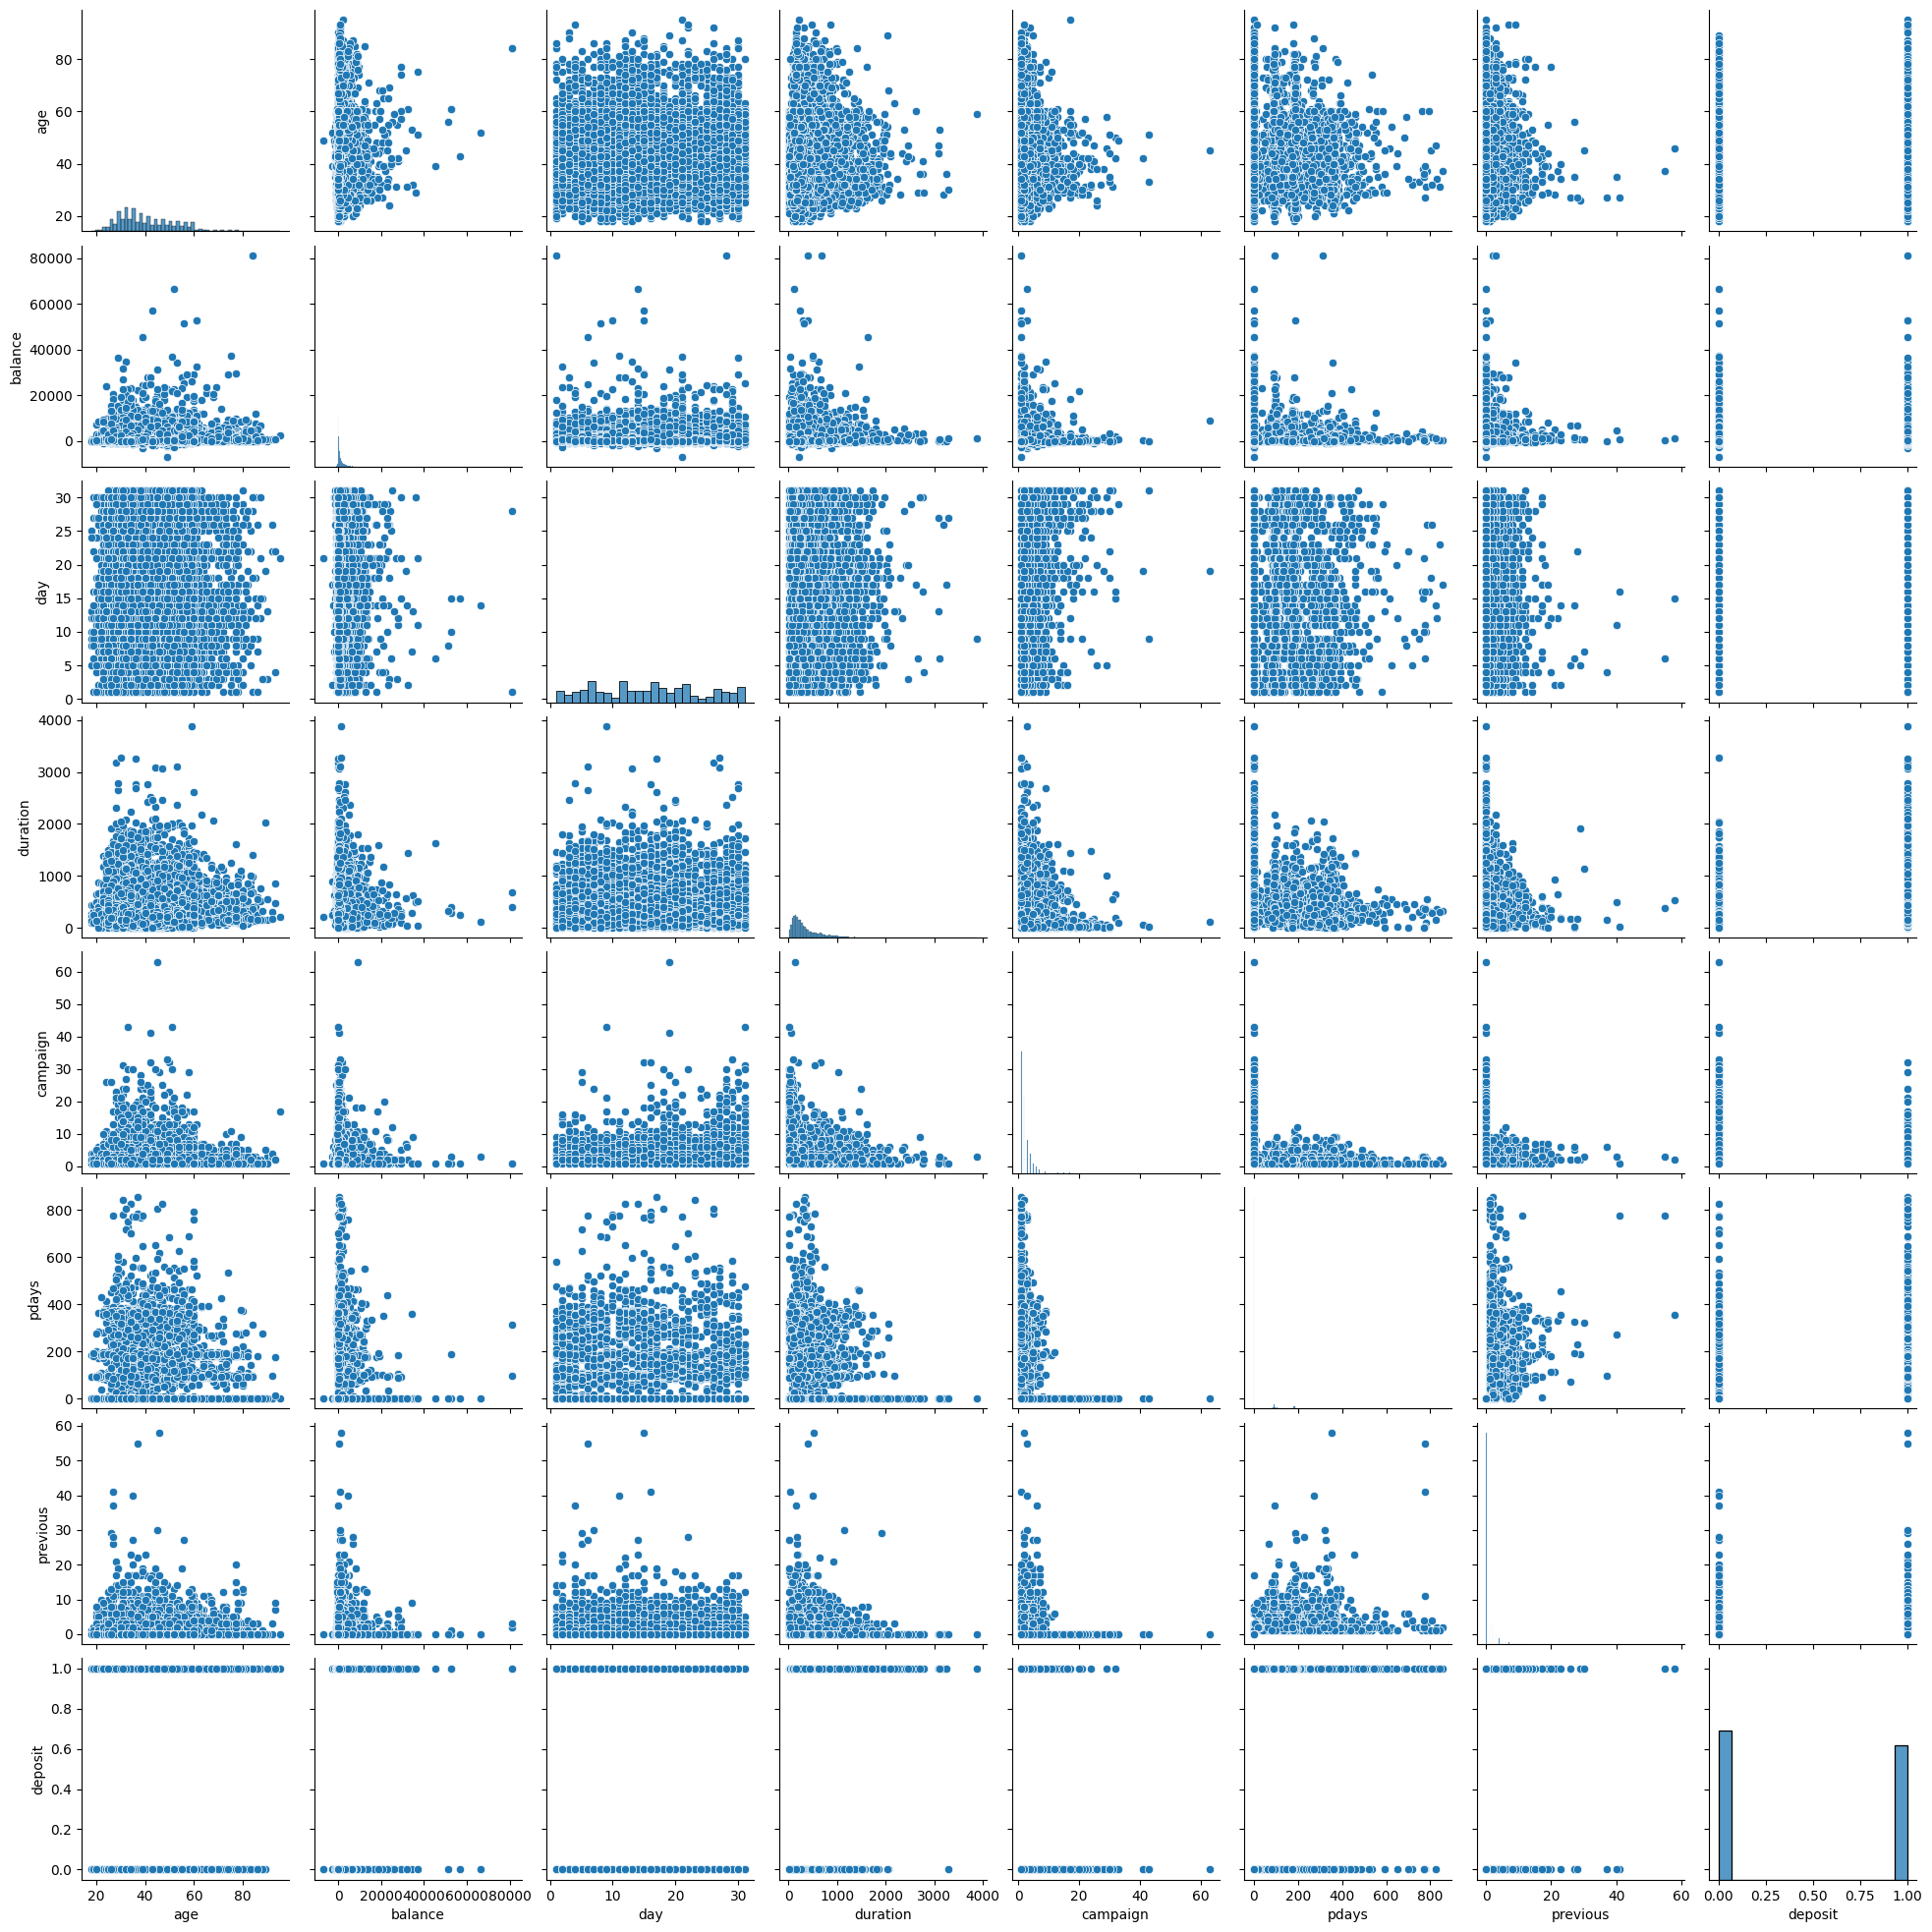

In [120]:
sns.pairplot(df)

In [133]:
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,5,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,5,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,5,673,2,-1,0,unknown,1


In [134]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [135]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,married,1,0,2343,1,0,unknown,5,5,1042,1,-1,0,3,1
1,56,0,married,1,0,45,0,0,unknown,5,5,1467,1,-1,0,3,1
2,41,10,married,1,0,1270,1,0,unknown,5,5,1389,1,-1,0,3,1
3,55,8,married,1,0,2476,1,0,unknown,5,5,579,1,-1,0,3,1
4,54,0,married,2,0,184,0,0,unknown,5,5,673,2,-1,0,3,1


In [136]:
df.drop(['marital'],axis=1, inplace=True)
df.drop(['contact'],axis=1, inplace=True)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,0,2343,1,0,5,5,1042,1,-1,0,3,1
1,56,0,1,0,45,0,0,5,5,1467,1,-1,0,3,1
2,41,10,1,0,1270,1,0,5,5,1389,1,-1,0,3,1
3,55,8,1,0,2476,1,0,5,5,579,1,-1,0,3,1
4,54,0,2,0,184,0,0,5,5,673,2,-1,0,3,1


In [138]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign     pdays  previous
0      1.491505  0.252525  1.930226  0.554168  0.481184  0.363260
1      1.239676  0.459974  3.154612  0.554168  0.481184  0.363260
2      0.019470  0.080160  2.929901  0.554168  0.481184  0.363260
3      1.155733  0.293762  0.596366  0.554168  0.481184  0.363260
4      1.071790  0.416876  0.867171  0.186785  0.481184  0.363260
...         ...       ...       ...       ...       ...       ...
11157  0.691015  0.473616  0.331287  0.554168  0.481184  0.363260
11158  0.187357  0.246658  0.832564  0.547981  0.481184  0.363260
11159  0.774958  0.464934  0.622258  0.186785  0.481184  0.363260
11160  0.148416  0.473926  1.045752  0.186785  1.109571  1.818332
11161  0.607072  0.473926  0.737530  0.554168  0.481184  0.363260

[11162 rows x 6 columns]


(10098, 15)

age             Axes(0.125,0.53;0.110714x0.35)
job          Axes(0.257857,0.53;0.110714x0.35)
education    Axes(0.390714,0.53;0.110714x0.35)
balance      Axes(0.523571,0.53;0.110714x0.35)
day          Axes(0.656429,0.53;0.110714x0.35)
duration     Axes(0.789286,0.53;0.110714x0.35)
campaign        Axes(0.125,0.11;0.110714x0.35)
pdays        Axes(0.257857,0.11;0.110714x0.35)
previous     Axes(0.390714,0.11;0.110714x0.35)
poutcome     Axes(0.523571,0.11;0.110714x0.35)
deposit      Axes(0.656429,0.11;0.110714x0.35)
dtype: object

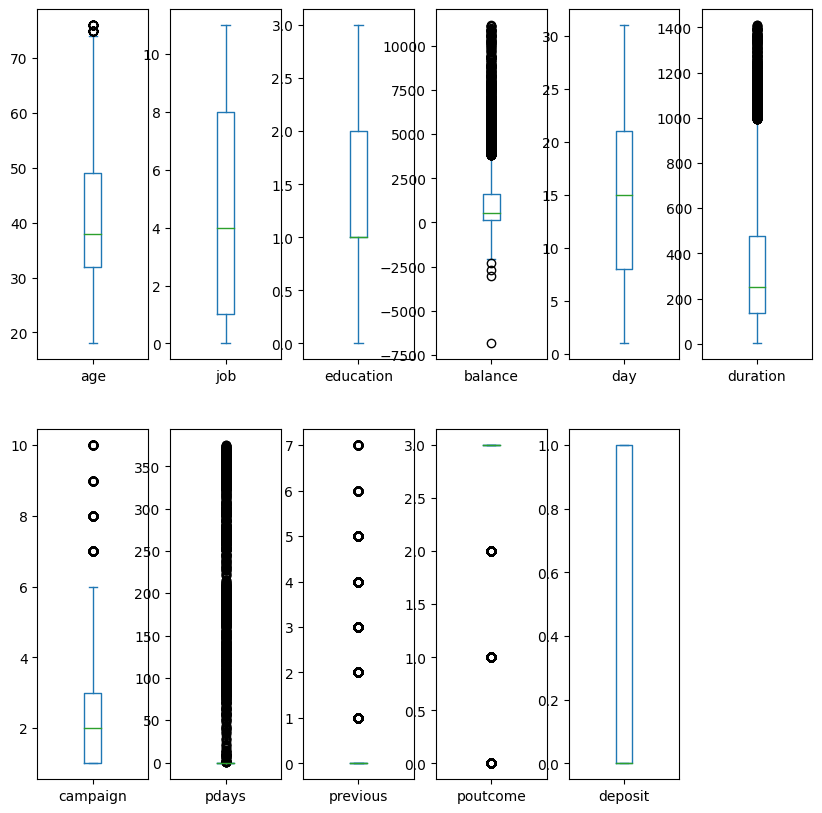

In [139]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [145]:
x_test=df.drop(['deposit'],axis=1) 
y_test=df['deposit']           
df['deposit'].value_counts()

0    5493
1    4605
Name: deposit, dtype: int64

In [146]:
xtrain,xtest,ytrain,ytest=train_test_split(x_test,y_test,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8078, 14) (2020, 14) (8078,) (2020,)


In [147]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

ROC_AUC Score: 0.8336411634111304               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1051
           1       0.86      0.78      0.82       969

    accuracy                           0.84      2020
   macro avg       0.84      0.83      0.83      2020
weighted avg       0.84      0.84      0.84      2020

[[928 209]
 [123 760]]


<Axes: >

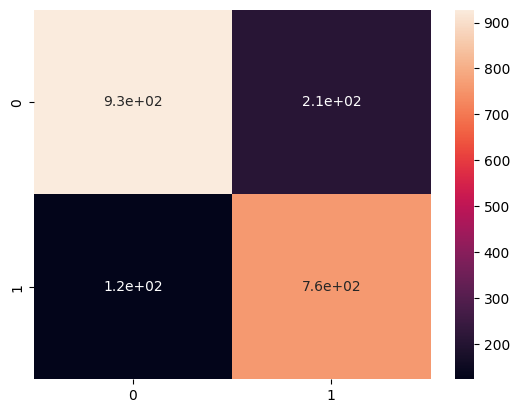

In [162]:
randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)

AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)
print("ROC_AUC Score:",AUC_RF,classification_report(y_pred,ytest))

cm=confusion_matrix(ytest,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

ROC_AUC Score: 0.7687107052778694               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1206
           1       0.70      0.76      0.73       814

    accuracy                           0.77      2020
   macro avg       0.76      0.77      0.76      2020
weighted avg       0.78      0.77      0.77      2020

[[940 197]
 [266 617]]


<Axes: >

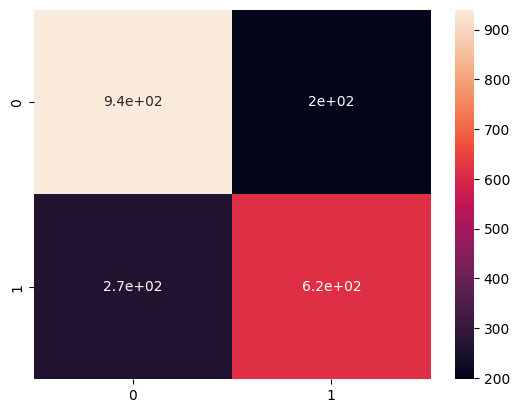

In [160]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print("ROC_AUC Score:",AUC_LR,classification_report(pred,ytest))

cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

ROC_AUC Score: 0.7836022323076236               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1194
           1       0.72      0.77      0.75       826

    accuracy                           0.79      2020
   macro avg       0.78      0.78      0.78      2020
weighted avg       0.79      0.79      0.79      2020

[[949 245]
 [188 638]]


<Axes: >

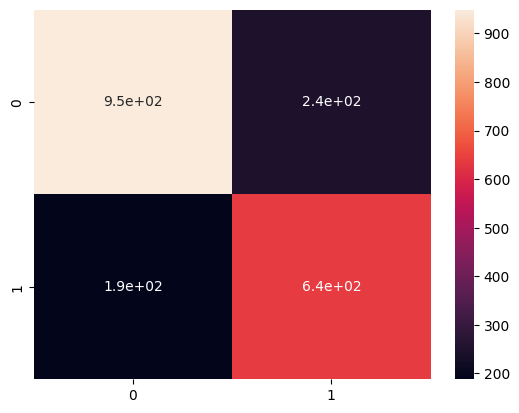

In [165]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y_predict = knn.predict(xtest)

acc_knn=accuracy_score(ytest,y_predict)
recall_knn=recall_score(ytest,y_predict)
precision_knn=precision_score(ytest,y_predict)
f1score_knn=f1_score(ytest,y_predict)

AUC_KN=roc_auc_score(y_predict,ytest)
print("ROC_AUC Score:",AUC_KN,classification_report(y_predict,ytest))
cm=confusion_matrix(y_predict,ytest)
print(cm)

sns.heatmap(cm,annot=True)

ROC_AUC_SCORE; 0.7836022323076236               precision    recall  f1-score   support

           0       0.84      0.81      0.83      1172
           1       0.75      0.79      0.77       848

    accuracy                           0.80      2020
   macro avg       0.80      0.80      0.80      2020
weighted avg       0.80      0.80      0.80      2020

[[955 217]
 [182 666]]


<Axes: >

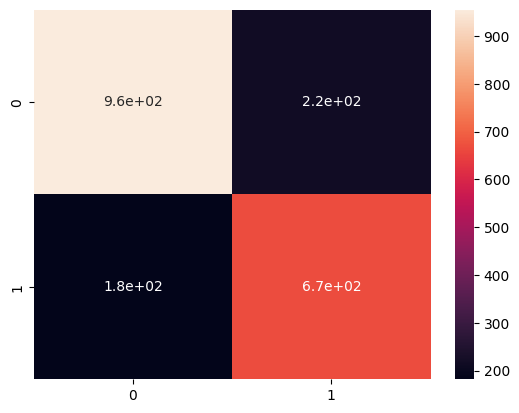

In [172]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(xtrain,ytrain)
y_predict= ABC.predict(xtest)

acc_ABC=accuracy_score(ytest,y_predict)
recall_ABC=recall_score(ytest,y_predict)
precision_ABC=precision_score(ytest,y_predict)
f1score_ABC=f1_score(ytest,y_predict)

AUC_AB=roc_auc_score(y_predict,ytest)
print("ROC_AUC_SCORE;",AUC_KN,classification_report(y_predict,ytest))
cm=confusion_matrix(y_predict,ytest)
print(cm)


sns.heatmap(cm,annot=True)

In [176]:
ind=['Logistic regression','Randomforest','KNeighbors','AdaBoost']
data={"Accuracy":[acc_lr,acc_rf,acc_knn,acc_ABC],"Recall":[recall_lr,recall_rf,recall_knn,recall_ABC],"Precision":[precision_lr,precision_rf,precision_knn,precision_ABC],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn,f1score_ABC],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN,AUC_AB]}
final_result=pd.DataFrame(data=data,index=ind)
final_result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.770792,0.698754,0.757985,0.727166,0.768711
Randomforest,0.835644,0.860702,0.784314,0.820734,0.833641
KNeighbors,0.785644,0.722537,0.772397,0.746635,0.783602
AdaBoost,0.802475,0.754247,0.785377,0.769497,0.800112
